In [73]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [37]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [78]:
end=dt.datetime.now()
start=dt.datetime(2019,1,1)
start, end

(datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2022, 8, 30, 23, 54, 35, 274973))

In [3]:
stockList=['CBA','NAB','WBC','ANZ']
stocks=[i+'.AX' for i in stockList]
stocks

['CBA.AX', 'NAB.AX', 'WBC.AX', 'ANZ.AX']

In [79]:
df=pdr.get_data_yahoo('AAPL',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.168346
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.366497
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.833576
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.753826
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.435398


In [80]:
df = df.reset_index()

In [81]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [82]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.168346
1,2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.366497
2,2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.833576
3,2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.753826
4,2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.435398
...,...,...,...,...,...,...,...
918,2022-08-24,168.110001,166.250000,167.320007,167.529999,53841500.0,167.529999
919,2022-08-25,170.139999,168.350006,168.779999,170.029999,51218200.0,170.029999
920,2022-08-26,171.050003,163.559998,170.570007,163.619995,78823500.0,163.619995
921,2022-08-29,162.899994,159.820007,161.149994,161.380005,73314000.0,161.380005


In [101]:
Close

Date
2000-01-03      0.999442
2000-01-04      0.915179
2000-01-05      0.928571
2000-01-06      0.848214
2000-01-07      0.888393
                 ...    
2022-08-24    167.529999
2022-08-25    170.029999
2022-08-26    163.619995
2022-08-29    161.380005
2022-08-30    158.910004
Name: Close, Length: 5702, dtype: float64

In [83]:
Close[Close.index>end-dt.timedelta(days=100)].describe(percentiles=[0.1,0.5,0.9])

count     69.000000
mean     151.834348
std       12.562987
min      130.059998
10%      136.550000
50%      148.839996
90%      169.398004
max      174.550003
Name: Close, dtype: float64

In [84]:
df=df[['Close']]
df

,Close
0,39.480000
1,35.547501
2,37.064999
3,36.982498
4,37.687500
...,...
918,167.529999
919,170.029999
920,163.619995
921,161.380005


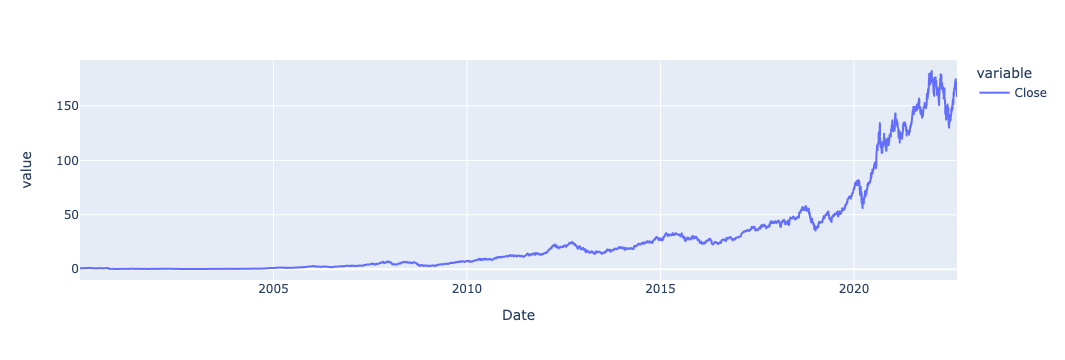

In [85]:
Close.plot()

In [86]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'


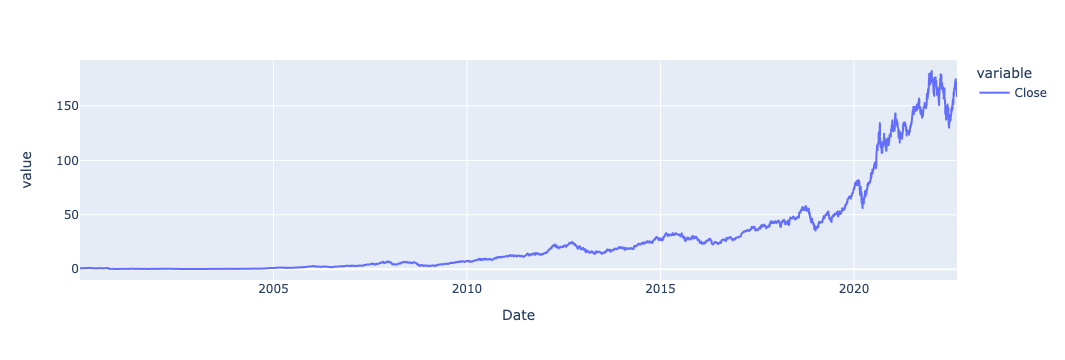

In [87]:
Close.plot()

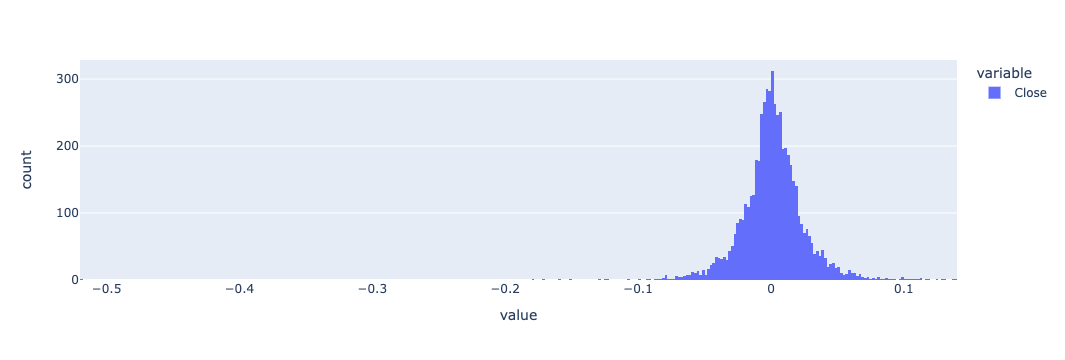

In [89]:
Close.pct_change().plot(kind='hist')

In [90]:
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

/var/folders/91/fkpnlg61565dbv8n6rs71hhm0000gn/T/ipykernel_26700/435867153.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Prediction
919,170.029999,NaN
920,163.619995,NaN
921,161.380005,NaN
922,158.910004,NaN


In [100]:
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X[0])

[39.47999954]


/var/folders/91/fkpnlg61565dbv8n6rs71hhm0000gn/T/ipykernel_26700/150191813.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [92]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 42.73500061  42.60250092  42.35749817  42.72249985  42.54499817
  42.70000076  42.60499954  42.73249817  43.00749969  42.76499939
  43.24250031  43.55749893  43.58250046  43.71749878  43.28749847
  43.74250031  43.96250153  43.88249969  43.63000107  43.125
  43.22750092  44.72499847  45.22750092  45.42750168  45.93249893
  46.52999878  47.00500107  46.63249969  47.04000092  48.77249908
  47.76250076  47.18500137  46.69749832  47.11750031  47.18000031
  47.48749924  47.81000137  48.50500107  48.83750153  48.92250061
  49.25        50.02500153  49.875       50.15499878  49.73749924
  49.71749878  49.80749893  49.8125      50.78250122  50.96500015
  51.13249969  51.86999893  51.79000092  51.31999969  51.07500076
  51.15250015  50.16749954  52.63000107  52.28749847  52.9375
  52.11999893  50.71500015  50.72499847  50.18000031  49.29499817
  46.43000031  47.16500092  47.72999954  47.52000046  47.25
  45.77249908  46.65000153  45.69499969  44.91500092  44.74250031
  44.55749893  44.3450012

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [94]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [95]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

/var/folders/91/fkpnlg61565dbv8n6rs71hhm0000gn/T/ipykernel_26700/1815086676.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



array([[135.86999512],
       [135.3500061 ],
       [138.27000427],
       [141.66000366],
       [141.66000366],
       [137.44000244],
       [139.22999573],
       [136.72000122],
       [138.92999268],
       [141.55999756],
       [142.91999817],
       [146.3500061 ],
       [147.03999329],
       [144.86999512],
       [145.86000061],
       [145.49000549],
       [148.47000122],
       [150.16999817],
       [147.07000732],
       [151.        ],
       [153.03999329],
       [155.3500061 ],
       [154.08999634],
       [152.94999695],
       [151.6000061 ]])

In [96]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction=lr.predict(x_future)
print(lr_prediction)

[156.78999329 157.3500061  164.86999512 161.50999451 161.50999451
 166.13000488 165.80999756 165.3500061  164.86999512 164.91999817
 147.18000412 168.49000549 172.1000061  160.55000305 158.70666504
 174.55000305 174.1499939  171.52000427 167.57000732 171.43499756
 167.52999878 170.02999878 163.61999512 161.38000488 158.91000366]

[138.64457629 138.1420843  140.96382793 144.23975779 144.23975779
 140.1617547  141.89151679 139.46598068 141.6016085  144.14311678
 145.45735495 148.77194711 149.43871703 147.34173677 148.29842973
 147.94088452 150.82060686 152.46340089 149.46772113 153.26547413
 155.23682402 157.4691076  156.25149569 155.14985595 153.84529073]


/var/folders/91/fkpnlg61565dbv8n6rs71hhm0000gn/T/ipykernel_26700/1130648777.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



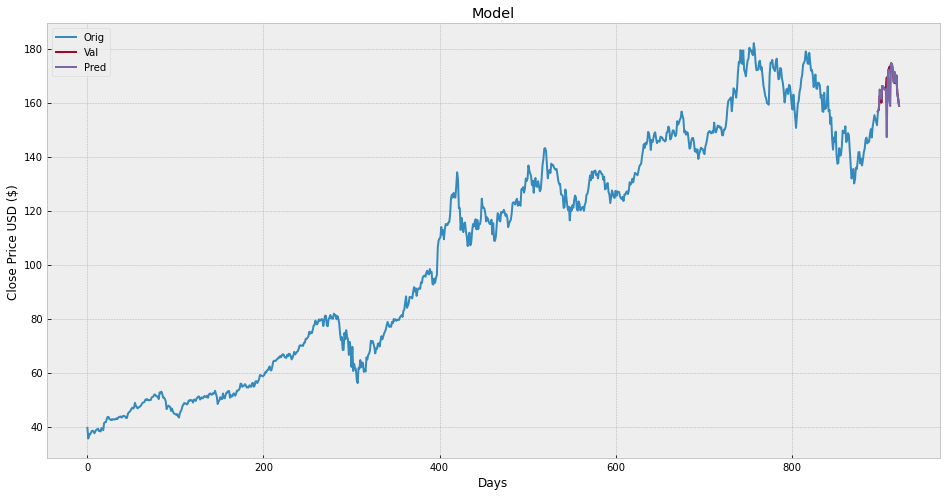

In [97]:
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

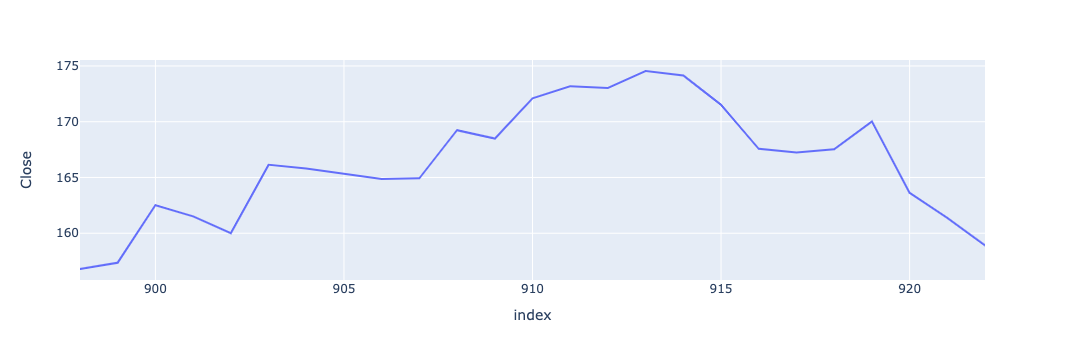

In [122]:
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'
plot1=df['Close']

px.line(plot1,y='Close',labels={'x':'date','y':'year'})
px.line(valid,y='Close',labels={'x':'date','y':'year'})
